# Newton-Cotes
# (Regla del rectángulo / Regla del trapecio y Simpson)
## Ejercicio 3

Aproximar el valor de la integral $\int_0^{\pi}sin(x)dx = 2$ con reglas compuestas del rectángulo y trapecio con un número de subintervalos $n \in \{1,10,20,30,40 \}$ y hacer gráfica de la forma error relativo vs $n$ ($n$ en el eje horizontal).

**Nota**: Los siguientes ejercicios están basados en las notas de clase disponibles en (https://github.com/ITAM-DS/Propedeutico/tree/master/Python/clases/2_calculo_DeI) y en el capítulo 6 del libro Numerical Methods in Engineering with Python 3 (Kiusalaas, 2013).

In [1]:
import numpy as np
from numpy import absolute
import math
from math import sin, pi, log

# Regla del rectángulo compuesta
En la regla del rectángulo compuesto se define el área total aproximada, $I$, debajo de la función $f(x)$ en el intervalo $\left[a,b\right]$, como la sumatoria de las áreas ($I_{i}$), de $n$ subpáneles rectangulares de espaciado $h=\frac{b-a}{n}$:
$$
I=\sum_{i=1}^{n}I_{i}
$$
donde el área del subpanel $i$, correspondiente a $I_{i}$, se define como:
$$
I_{i}=hf\left(x_{i}\right)
$$
Donde $x_{i}$, es el nodo $i$, con $i=1,\ldots,n$. Note que $x_{0}=a$, y $x_{n}=b$.
<br><br>

In [20]:
# Crear una función para la regla del rectangulo (compuesta):
def rec_vec(f, a, b, n): # fun: f(x), a, b: del intervalo [a,b]
    h = float((b-a))/n # definimos espaciado igual entre nodos - que sea float
    area = 0
    for i in range(0, n):
            area_i = (f(h*i)*(h)) # area de cada panel
            # print(f"El área del panel {i} en este paso es {area_i}")
            area = area + area_i
    return area

In [22]:
# Crear un vector de errores de la aproximación
def err_re_trap_comp(area, area_ast):
    err_abs = absolute(area-area_ast) # Por si queremos graficar solo el error
    err_rel = err_abs/absolute(area_ast)
    return err_abs, err_rel

In [23]:
# test
fun = sin # f(x)
a, b = [0, pi] # puntos del intervalo [a,b]
n = 1 # paneles
area_ast = 2

aprox_area = rec_vec(fun, a, b, n)
err_abs_t, err_rel_t = err_re_trap_comp(aprox_area, area_ast)

print(f"El área aproximada por el método de la regla del trapecio compuesto con {n} paneles es {aprox_area}")
print(f"El valor exacto del área es {area_ast} y el error absoluto de la aproximación es {err_abs_t}")
print(f"El error relativo de la aproximación es {err_rel_t}")
print('Esto tiene sentido dado que el "rectangulo" creado es una línea, sin área.')


El área aproximada por el método de la regla del trapecio compuesto con 1 paneles es 0.0
El valor exacto del área es 2 y el error absoluto de la aproximación es 2.0
El error relativo de la aproximación es 1.0
Esto tiene sentido dado que el "rectangulo" creado es una línea, sin área.


In [24]:
# Desarrollo del ejercicio para la regla compuesta del rectángulo
fun = sin # f(x)
a, b = [0, pi] # puntos del intervalo [a,b]
n_list = [1,10,20,30,40] #
nvec = np.array(n_list)

aprox_rec = np.empty(nvec.shape) #un vector vacío que tenga el tamaño de la lista n
pos = 0
for z in n_list:
    aprox_list_z = rec_vec(fun, a, b, z)
    # print(f"La aproximación en este paso para {z} paneles es {aprox_list_z}")
    aprox_rec[pos] = aprox_list_z
    pos =+ 1   
    
print(' ') ; print(f"El vector de aproximación de la integral es {aprox_rec}")

# Se hace lo mismo, pero ahora para generar vectores de errores
area_ast = 2 # area exacta a comaprar
err_rec = np.empty([nvec.shape[0], 2])
pos = 0
for z in aprox_rec:
    err_ab, err_re = err_re_trap_comp(aprox_rec[pos],area_ast)
    # print(f"El error en este paso para {z}  es {err_re}")
    err_rec[pos, :] = err_ab, err_re
    pos =+ 1
    
print(' ') ; print(f"El vector de errores relativos es {err_rec[:,1]}")

 
El vector de aproximación de la integral es [0.00000000e+000 1.99897181e+000 9.88131292e-323 1.48219694e-322
 1.97626258e-322]
 
El vector de errores relativos es [1.00000000e+00 5.14094751e-04 4.85836364e+01 4.85836364e+01
 4.85836364e+01]


In [25]:
# Hacer una matriz para ver los erroes?

print('<<'*5, 'Matriz de errores', '>>'*5)
mat_names_er = ['# de Paneles      ', 'EA', 'ER'] 
mat_err_abs = np.ndarray.tolist(err_rec[:,0])
mat_err_rel = np.ndarray.tolist(err_rec[:,1])
print('Número de paneles', n_list,);
print('Errores absolutos', mat_err_abs); 
print('Errores relativos', mat_err_rel)
print('-'*10)

<<<<<<<<<< Matriz de errores >>>>>>>>>>
Número de paneles [1, 10, 20, 30, 40]
Errores absolutos [2.0, 0.0010281895029340404, 214.0729020979021, 292.1148601398602, 370.15681818181815]
Errores relativos [1.0, 0.0005140947514670202, 48.583636363636366, 48.583636363636366, 48.583636363636366]
----------


**Obs:** En este ejemplo parece que el área no mejora su aproximación a medida que el número de paneles rectangulares, posiblemente por el error que surge de la aritmética de punto flotante de los números.

# Regla del Trapecio compuesto

En la regla del Trapecio compuesto se define el área total aproximada, $I$, debajo de la función $f(x)$ en el intervalo $\left[a,b\right]$, como la sumatoria de las áreas ($I_{i}$), de $n$ subpáneles trapezoidales de espaciado $h=\frac{b-a}{n}$:
$$
I=\sum_{i=0}^{n-1}I_{i}
$$
donde el área del subpanel $i$, correspondiente a $I_{i}$, se define como:
$$
I_{i}=\frac{h}{2}\left[f\left(x_{i}\right)+f\left(x_{i+1}\right)\right]
$$
Donde $x_{i}$, es el nodo $i$, con $i=0,1,\ldots,n$. Note que $x_{0}=a$, y $x_{n}=b$.
<br><br>
A continuación se crea la función "trap_comp", que computa la regla compuesta del trapecio, incorporando los parámetros f, a, b y n, correspondientes a la función $f(x)$ a aproximar, los elementos del intervalo $\left[a,b\right]$, y el número de páneles deseados, respectivamente. 
Note que para el caso de un subpanel ($n = 1$), no es necesario iterar.


In [26]:
# Crear una función para la regla compuesta del trapecio
def trap_comp_vec(f, a, b, n): # fun: f(x), a, b: del intervalo [a,b], n: número de páneles
    h = float((b-a))/n # definimos espaciado igual entre nodos - que sea float
    area = 0
    for i in range(0, n):
            area_i = (h/2)*(f(h*i) + f(h*(i+1))) # area de cada panel
            # print(f"El área del panel {i} en este paso es {area_i}")
            area = area + area_i
    return area


In [27]:
# test
fun = sin # f(x)
a, b = [0, pi] # puntos del intervalo [a,b]
n = 16 # paneles
area_ast = 2

aprox_area = trap_comp_vec(fun, a, b, n)
err_abs_t, err_rel_t = err_re_trap_comp(aprox_area, area_ast)

print(f"El área aproximada por el método de la regla del trapecio compuesto con {n} paneles es {aprox_area}")
print(f"El valor exacto del área es {area_ast} y el error absoluto de la aproximación es {err_abs_t}")
print(f"El error relativo de la aproximación es {err_rel_t}")



El área aproximada por el método de la regla del trapecio compuesto con 16 paneles es 1.993570343772339
El valor exacto del área es 2 y el error absoluto de la aproximación es 0.006429656227660896
El error relativo de la aproximación es 0.003214828113830448


In [29]:
# Desarrollo del ejercicio
fun = sin # f(x)
a, b = [0, pi] # puntos del intervalo [a,b]
n_list = [1,10,20,30,40]#
nvec = np.array(n_list)

aprox_tra = np.empty(nvec.shape) #un vector vacío que tenga el tamaño de la lista n
pos = 0
for z in n_list:
    aprox_list_z = trap_comp_vec(fun, a, b, z)
    # print(f"La aproximación en este paso para {z} paneles es {aprox_list_z}")
    aprox_tra[pos] = aprox_list_z
    pos =+ 1   
    
print(' ') ; print(f"El vector de aproximación de la integral es {aprox_tra}")

# Se hace lo mismo, pero ahora para generar vectores de errores
area_ast = 2 # area exacta a comaprar
err_tra = np.empty([nvec.shape[0], 2])
pos = 0
for z in aprox_tra:
    err_ab, err_re = err_re_trap_comp(aprox_tra[pos],area_ast)
    # print(f"El error en este paso para {z}  es {err_re}")
    err_tra[pos, :] = err_ab, err_re
    pos =+ 1
    
print(' ') ; print(f"El vector de errores relativos es {err_tra[:,1]}")

 
El vector de aproximación de la integral es [1.92367069e-016 1.99897181e+000 9.88131292e-323 1.48219694e-322
 1.97626258e-322]
 
El vector de errores relativos es [1.00000000e+00 5.14094751e-04 1.00000000e+01 1.50000000e+01
 2.00000000e+01]


In [30]:
# Hacer una matriz para ver los erroes?

print('<<'*5, 'Matriz de errores', '>>'*5)
mat_names_er = ['# de Paneles      ', 'EA', 'ER'] 
mat_err_abs = np.ndarray.tolist(err_tra[:,0])
mat_err_rel = np.ndarray.tolist(err_tra[:,1])
print('Número de paneles', n_list,);
print('Errores absolutos', mat_err_abs); 
print('Errores relativos', mat_err_rel)
print('-'*10)

<<<<<<<<<< Matriz de errores >>>>>>>>>>
Número de paneles [1, 10, 20, 30, 40]
Errores absolutos [1.9999999999999998, 0.0010281895029342625, 20.0, 30.0, 40.0]
Errores relativos [0.9999999999999999, 0.0005140947514671312, 10.0, 15.0, 20.0]
----------


# Gráfica de comparación de errores relativos entre los computados por las reglas compuestas del rectángulo y del trapecio.

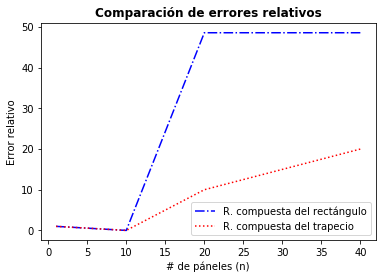

In [34]:
# Gráfico
import matplotlib.pyplot as plt

x_ax = np.array(n_list)
ab_er_rec = err_rec[:,0]; ab_er_tra = err_tra[:,0]
re_er_rec = err_rec[:,1]; re_er_tra = err_tra[:,1]


# Subgráfico 2 para mostrar el error relativo
plt.plot(x_ax, re_er_rec, '-.b', x_ax, re_er_tra, ':r')
plt.legend(('R. compuesta del rectángulo', 'R. compuesta del trapecio'), loc = 0)
plt.xlabel('# de páneles (n)'); plt.ylabel('Error relativo')
plt.title('Comparación de errores relativos', fontweight="bold")

plt.grid(False)
plt.show()

**Nota:** Parece ser que luego de $n=10$ se materializa el error proveniente de la aritmética de punto flotante.